<a href="https://colab.research.google.com/github/ravishnirala/CODSOFT/blob/main/CODSOFT_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TASK3: IRIS FLOWER CLASSIFICATION **

      AUTHOR: RAVISH KUMAR
      BATCH:  AUGUST 71
      DOMAIN: DATA SCIENCE

      AIM: TO DEVELOPE A MODEL THAT CAN CLASSIFY FLOWER INTO DIFFERENT SPECIES BASED ON THEIR SEPAL AND PETAL MEASUREMENTS.

In [5]:
# IMPORTING  SOME LIBRARY
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [6]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape


(150, 5)

In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

*Converting the unique value into pandas series as 0 1 2 .....*

In [9]:
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


*Getting ststical value of dataset *

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# Checking any null values in data set
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is not any null values by above code

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# * Now I am going to visualize the dataset *

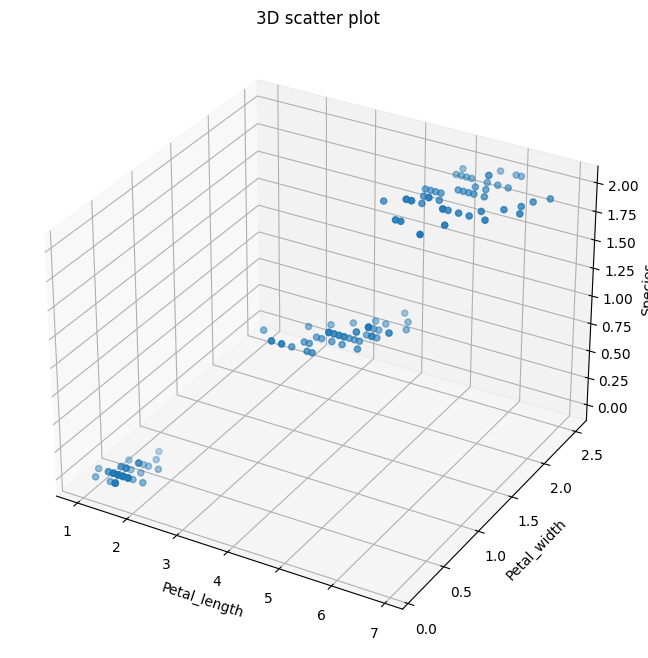

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('Petal_length')
ax.set_ylabel('Petal_width')
ax.set_zlabel('Species')
plt.title('3D scatter plot')
plt.show()

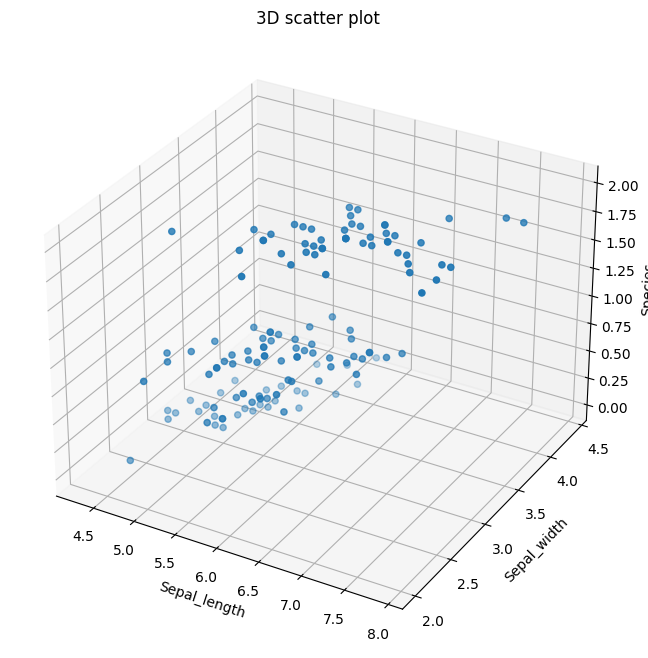

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_width')
ax.set_zlabel('Species')
plt.title('3D scatter plot')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

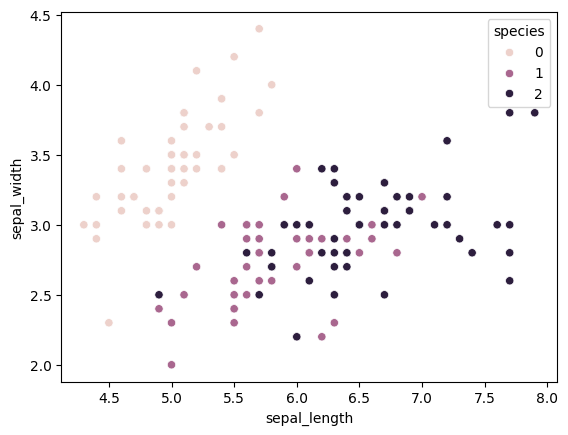

In [15]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

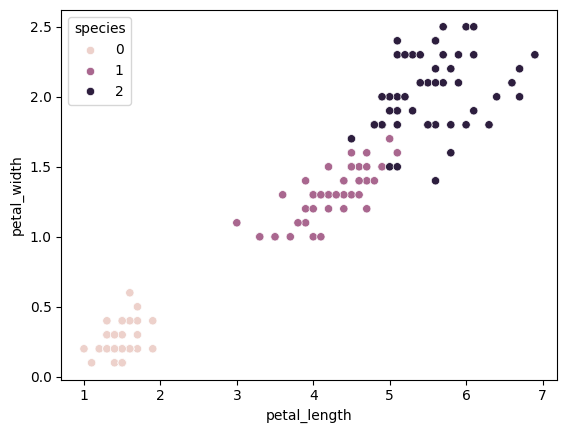

In [16]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)

*From above the sns technique we can classify the species*

# Now I am going to use Elbow technique to cluster the data

In [17]:
#Applying Elbow Technique
# Here inertia is sum of square distance
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [18]:
# printing sum of square distance
inertia

[780.8244000000001,
 179.12221033868093,
 87.31002785114046,
 66.93153762993764,
 50.41949126984127,
 42.765768576029444,
 35.40031968233056,
 31.284012882447662,
 29.616959156785242]

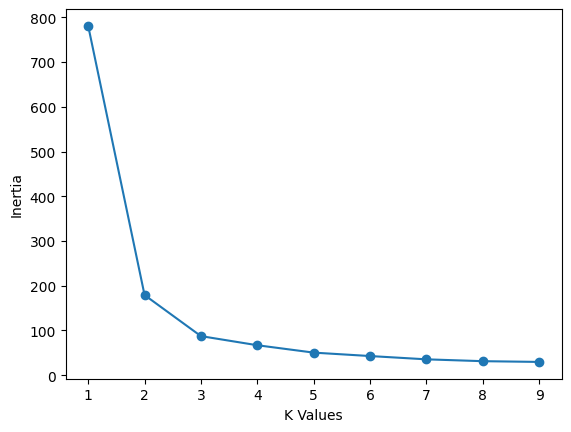

In [19]:
# Plotting the Elbow Graph
plt.xlabel('K Values')
plt.ylabel('Inertia')
plt.plot(k_values, inertia, marker='o')

*From above graph we conclude that the Elbow on the so the efficient and optimal cluster is 3.*

In [20]:
kmeans=KMeans(n_clusters=3,random_state=0)
y_pred=kmeans.fit_predict(df[['petal_length','petal_width']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Here I have predicted the clusterize data and store in the y_pred

**Now I am going to add new cluster column to dataset**

In [21]:
df['cluster']=y_pred
df.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


*Now performing accuracy measure to check performance of model by cunfusion matrix.*

In [22]:
confusion_matrix=confusion_matrix(df['species'],df['cluster'])
confusion_matrix

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

**Plotting  the confusion matrix**

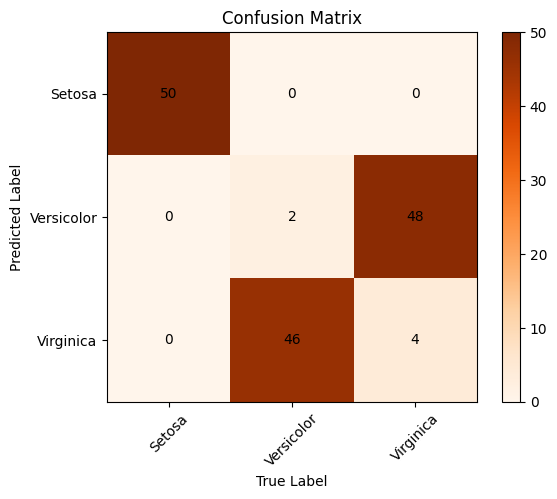

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
true_label=df.species
predicted_label=df.cluster
cm=confusion_matrix(true_label,predicted_label)
class_labels=['Setosa','Versicolor','Virginica']
# plotting confusion matrix
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels,rotation=45)
plt.yticks(tick_marks,class_labels)
#plt.scatter(true_label,predicted_label)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Filling the matrix with value
for i in range (len(class_labels)): # Use len() to get the number of labels
    for j in range (len(class_labels)):
        plt.text(j,i,str( cm[i][j]),ha='center',va='center')
plt.show()

# Conclusion:

***We have classified the IRIS data set based on the petal and sepal length and petal and sepal width.***